In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [14]:
train_df = pd.read_csv("/content/train (1).csv")
test_df = pd.read_csv("/content/test (1).csv")

print(train_df.shape)
print(test_df.shape)


(18306, 17)
(4152, 17)


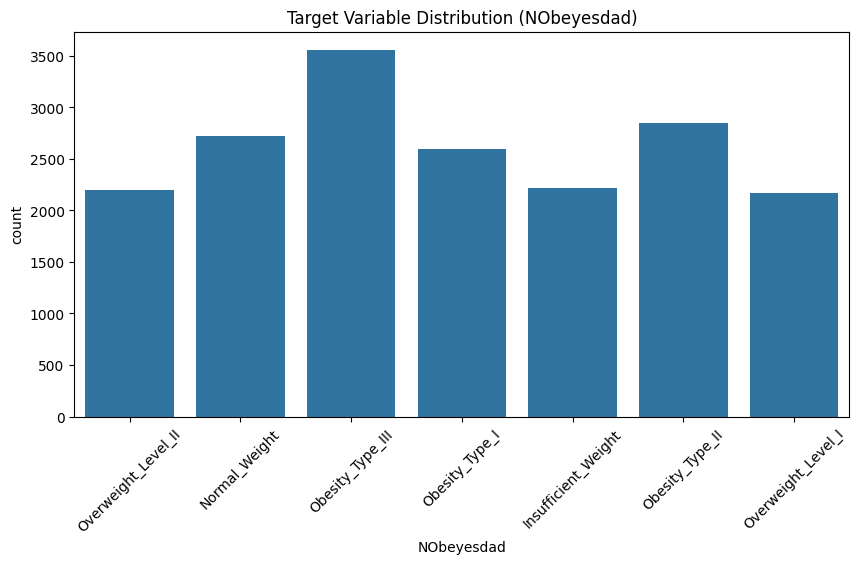

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_df["NObeyesdad"])
plt.xticks(rotation=45)
plt.title("Target Variable Distribution (NObeyesdad)")
plt.show()


In [16]:
X = train_df.drop("NObeyesdad", axis=1)
y = train_df["NObeyesdad"]


In [17]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


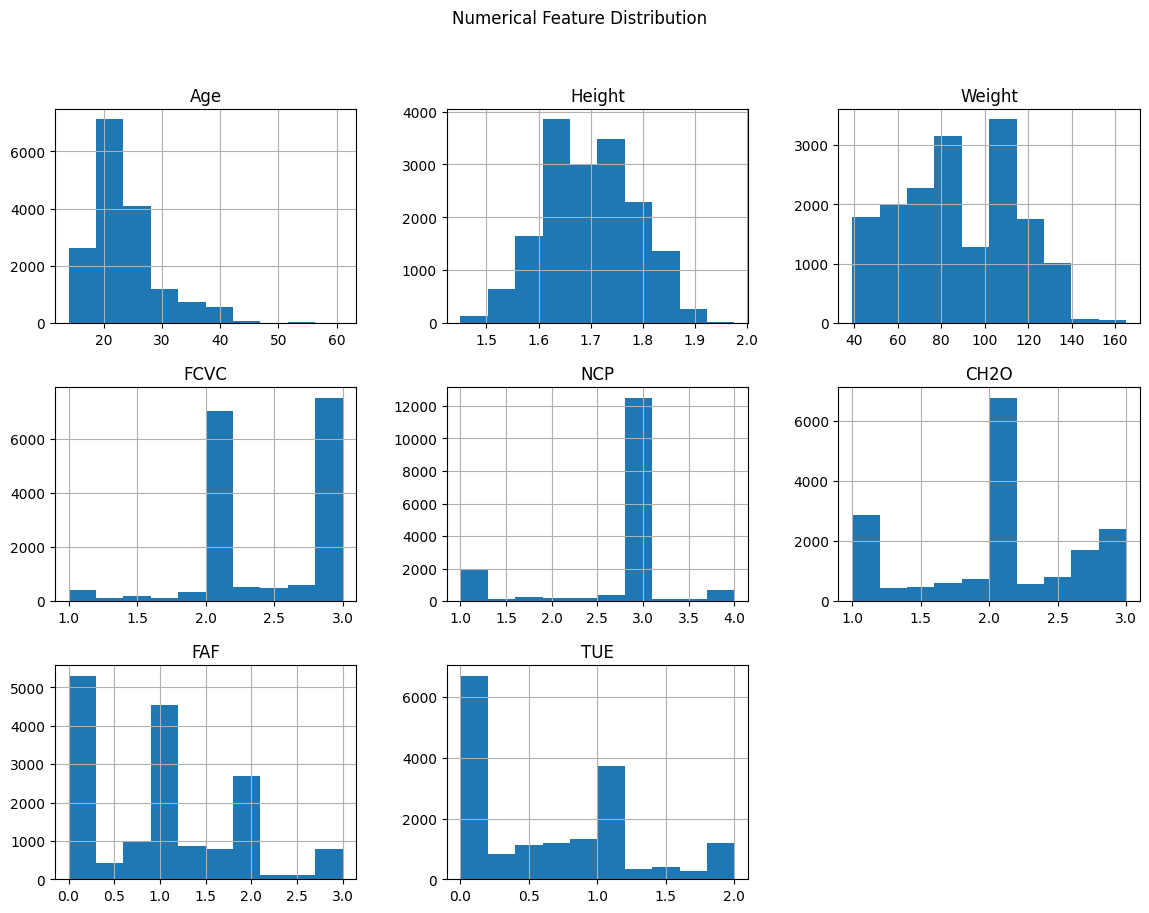

In [18]:
num_cols = X.select_dtypes(include=["int64","float64"]).columns

X[num_cols].hist(figsize=(14,10))
plt.suptitle("Numerical Feature Distribution")
plt.show()


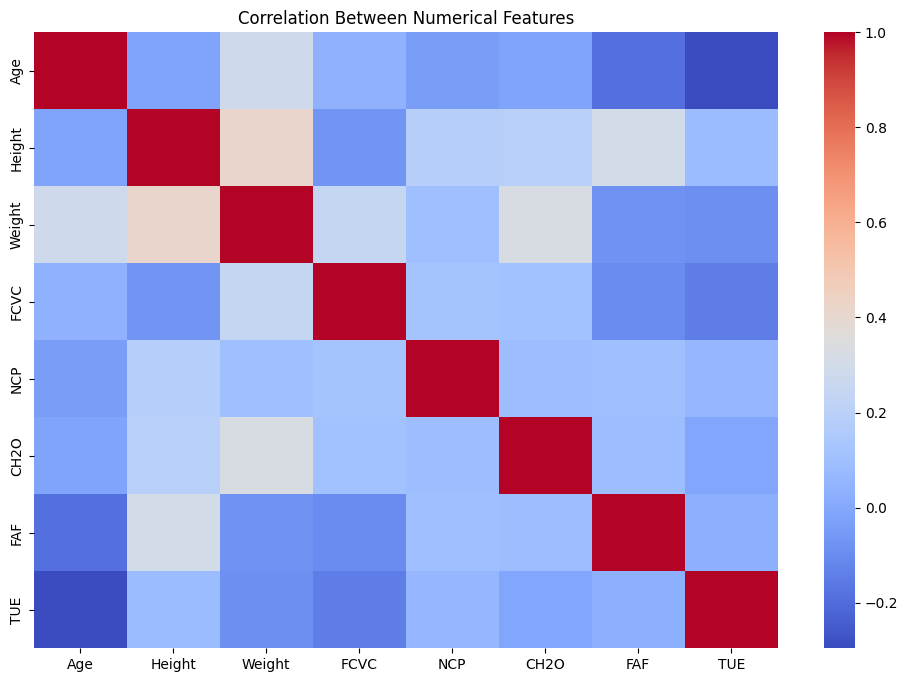

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df[num_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Between Numerical Features")
plt.show()


In [20]:
test_ids = test_df["id"]
X_test_final = test_df.drop("id", axis=1)


In [21]:
cat_cols = X.select_dtypes(include=["object"]).columns


In [22]:
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])


In [23]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


In [24]:
model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [25]:
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))


Accuracy: 0.8776624795193884


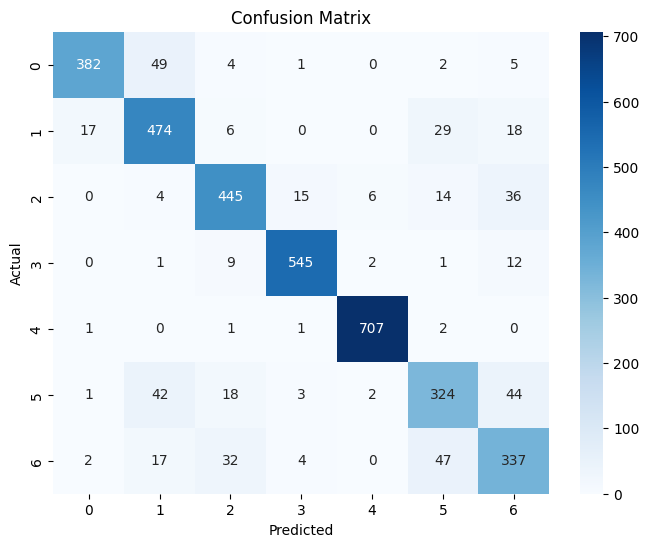

In [26]:
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [27]:
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.86      0.90       443
           1       0.81      0.87      0.84       544
           2       0.86      0.86      0.86       520
           3       0.96      0.96      0.96       570
           4       0.99      0.99      0.99       712
           5       0.77      0.75      0.76       434
           6       0.75      0.77      0.76       439

    accuracy                           0.88      3662
   macro avg       0.87      0.86      0.87      3662
weighted avg       0.88      0.88      0.88      3662



In [28]:
test_predictions = model.predict(X_test_final)
final_predictions = le.inverse_transform(test_predictions)


In [29]:
submission = pd.DataFrame({
    "id": test_ids,
    "NObeyesdad": final_predictions
})

submission.to_csv("submission_1.csv", index=False)
print("✅ submission.csv created successfully!")


✅ submission.csv created successfully!
